In [35]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

In [115]:
class CoinFlipper:
    def __init__(self, num_coins=2):
        self.num_coins = num_coins
        self.simulator = AerSimulator()
        
    def create_circuit(self, bias=None):
        qc = QuantumCircuit(self.num_coins, self.num_coins)
        
        for i in range(self.num_coins):
            if bias is None:
                qc.h(i)
            else:
                qc.ry(bias[i], i)
        
        qc.measure_all()
        
        return qc
    
    def flip_coins(self, num_trials=1000):
        circuit = self.create_circuit()
        job = self.simulator.run(circuit, shots=num_trials)
        result = job.result()
        counts = result.get_counts()
        
        readable_counts = {}
        for bitstring, count in counts.items():
            first, _ = bitstring.split(" ")
            
            coins = ''.join('H' if bit == '0' else 'T' for bit in first)
            readable_counts[coins] = count
            
        return readable_counts
    
    def plot_res(self, counts):
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111)
        ax.set_facecolor('white')
        fig.patch.set_facecolor('white')
        
        all_outcomes = {}
        for i in range(2**self.num_coins):
            binary = format(i, f'0{self.num_coins}b')
            outcome = ''.join('H' if bit == '0' else 'T' for bit in binary)
            all_outcomes[outcome] = 0
        
        all_outcomes.update(counts)
        
        outcomes = list(all_outcomes.keys())
        values = list(all_outcomes.values())
        total = sum(values)
        probabilities = [v/total for v in values]
        
        bars = plt.bar(outcomes, probabilities, color='royalblue')
        
        plt.ylabel('Probability', color='black')
        plt.xlabel('Outcomes', color='black')
        plt.title(f'Distribution of {self.num_coins}-Coin Flip Outcomes', color='black', pad=20)
        
        ax.tick_params(axis='both', colors='black')
        
        for i, v in enumerate(probabilities):
            plt.text(i, v, f'{v:.3f}', ha='center', va='bottom', color='black')

        plt.grid(True, alpha=0.3, color='gray')
        
        plt.show()
    
    def draw_circuit(self):
        return self.create_circuit().draw('mpl')

In [132]:
flipper = CoinFlipper(num_coins=4)

In [133]:
res = flipper.flip_coins(num_trials=10000)

In [134]:
for idx, (outcome, count) in enumerate(res.items()):
    if idx < 10:
        print(f"{outcome}: {count}")
    else:
        print("Etc...")
        break

HTHT: 621
HHHH: 629
HHHT: 658
TTTH: 614
THTT: 598
HTHH: 626
HTTH: 595
TTHT: 607
HHTT: 614
HHTH: 625
Etc...


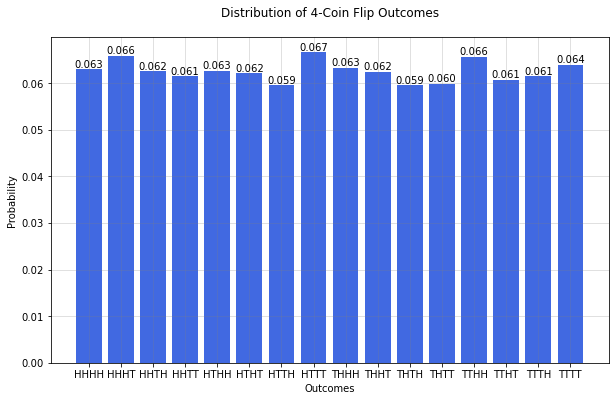

In [135]:
flipper.plot_res(res)

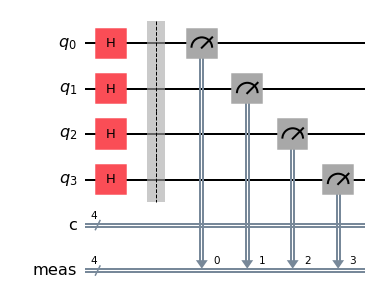

In [136]:
flipper.draw_circuit()